# Exploracion de los datos del dataset shoes-men

In [1]:
%pip install seaborn
%pip install pandas
%pip install plotly --upgrade 
%pip install prettytable
%pip install nbformat --upgrade 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import prettytable

prettytable.DEFAULT = 'DEFAULT'

# Cargar el dataset
df = pd.read_csv("iris.csv")

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
men_shoes_data = pd.read_csv("MEN_SHOES.csv")
men_shoes_data.head()

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,"2,242","₹1,098","Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,₹674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,"16,662",₹588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,₹599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,₹982,Men's Velocity Runner Lp Running Shoe,4.0


In [3]:
men_shoes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23940 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23940 non-null  object 
 1   How_Many_Sold    23940 non-null  object 
 2   Current_Price    23142 non-null  object 
 3   Product_details  23940 non-null  object 
 4   RATING           23940 non-null  float64
dtypes: float64(1), object(4)
memory usage: 935.3+ KB


In [4]:
# Codigo para convertir la columna de numero de pares vendidos a un valor numerico.
men_shoes_data['How_Many_Sold'] = men_shoes_data['How_Many_Sold'].apply(lambda cantidad: cantidad.replace(',', ''))
men_shoes_data['How_Many_Sold'] = pd.to_numeric(men_shoes_data['How_Many_Sold'], errors='coerce').astype('Int64')
men_shoes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23940 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23940 non-null  object 
 1   How_Many_Sold    23940 non-null  Int64  
 2   Current_Price    23142 non-null  object 
 3   Product_details  23940 non-null  object 
 4   RATING           23940 non-null  float64
dtypes: Int64(1), float64(1), object(3)
memory usage: 958.7+ KB


In [5]:
# Codigo para convertir la columna de precio actual a un valor numerico.

# Eliminar de la columna cualquier caracter no-numerico menos el punto.
import re
men_shoes_data['Current_Price'] = men_shoes_data['Current_Price'].apply(lambda precio: re.sub(r"[^\d.]", "", str(precio)))
# Paso 1: Convertir a numérico (los strings vacíos o no numéricos serán NaN)
men_shoes_data['Current_Price'] = pd.to_numeric(men_shoes_data['Current_Price'], errors='coerce')
# Paso 2: Verificar si hay valores con decimales no cero
tiene_decimales = (men_shoes_data['Current_Price'].dropna() % 1 != 0).any()
# Paso 3: Convertir a Int64 si no hay decimales, de lo contrario queda float
if not tiene_decimales:
    men_shoes_data['Current_Price'] = men_shoes_data['Current_Price'].astype('Int64')

In [6]:
men_shoes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23940 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23940 non-null  object 
 1   How_Many_Sold    23940 non-null  Int64  
 2   Current_Price    23142 non-null  Int64  
 3   Product_details  23940 non-null  object 
 4   RATING           23940 non-null  float64
dtypes: Int64(2), float64(1), object(2)
memory usage: 982.0+ KB


In [7]:
men_shoes_data = men_shoes_data.dropna(subset=['How_Many_Sold', 'Current_Price'])
men_shoes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23142 entries, 0 to 23939
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Name       23142 non-null  object 
 1   How_Many_Sold    23142 non-null  Int64  
 2   Current_Price    23142 non-null  Int64  
 3   Product_details  23142 non-null  object 
 4   RATING           23142 non-null  float64
dtypes: Int64(2), float64(1), object(2)
memory usage: 1.1+ MB


In [8]:
men_shoes_data.describe()

,How_Many_Sold,Current_Price,RATING
count,23142.0,23142.0,23142.00000
mean,3607.896552,842.258621,3.82069
std,10896.836132,387.523381,0.40462
min,2.0,231.0,2.40000
25%,173.0,588.0,3.60000
50%,406.5,776.5,4.00000
75%,1795.0,1080.0,4.00000
max,72611.0,2159.0,4.40000


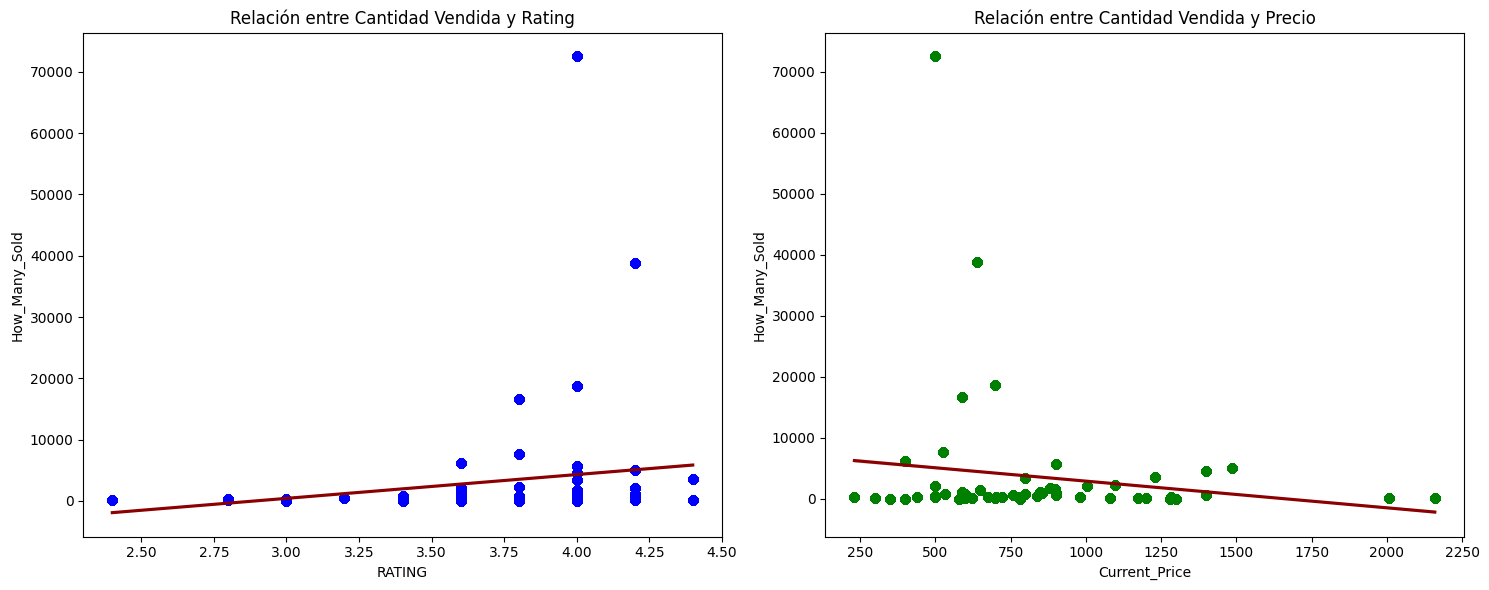

In [9]:
plt.figure(figsize=(15, 6))

# Primer gráfico
plt.subplot(1, 2, 1)
sns.regplot(data=men_shoes_data, 
            x='RATING', 
            y='How_Many_Sold',
            scatter_kws={'alpha':0.3, 'color':'blue'},
            line_kws={'color':'darkred'})
plt.title('Relación entre Cantidad Vendida y Rating')

# Segundo gráfico
plt.subplot(1, 2, 2)
sns.regplot(data=men_shoes_data, 
            x='Current_Price', 
            y='How_Many_Sold',
            scatter_kws={'alpha':0.3, 'color':'green'},
            line_kws={'color':'darkred'})
plt.title('Relación entre Cantidad Vendida y Precio')

plt.tight_layout()
plt.show()

In [10]:
from collections import Counter

# Procesamiento del texto
texto = ' '.join(men_shoes_data['Product_details'].astype(str)).lower()
palabras = re.findall(r'\b\w+\b', texto)  # Extraer palabras eliminando puntuación

# Contar frecuencias y crear DataFrame
frecuencias = Counter(palabras)
df_palabras = pd.DataFrame(frecuencias.items(), columns=['Palabra', 'Frecuencia']).sort_values('Frecuencia', ascending=False)

# Filtrar stopwords opcional (descomentar para usar)
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('spanish'))  # o 'english' según el idioma
# df_palabras = df_palabras[~df_palabras['Palabra'].isin(stop_words)]

# Tomar las 50 palabras más comunes
top_palabras = df_palabras.head(50)

# Crear treemap interactivo
fig = px.treemap(top_palabras,
                 path=['Palabra'],
                 values='Frecuencia',
                 title='Frecuencia de Palabras en Descripciones de Zapatos',
                 color='Frecuencia',
                 color_continuous_scale='Rainbow')

# Personalizar diseño
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25),
                  title_font=dict(size=20),
                  hoverlabel=dict(bgcolor="white"))

fig.update_traces(textinfo='label+value',
                  textfont=dict(size=14),
                  marker=dict(cornerradius=5))

fig.show()

In [11]:
from collections import Counter

# Procesamiento del texto
# Calcular la mediana de la columna 'How_Many_Sold'
mediana = men_shoes_data['How_Many_Sold'].median()

# Filtrar las filas donde 'How_Many_Sold' es mayor que la mediana
filtrado = men_shoes_data[men_shoes_data['How_Many_Sold'] > mediana]

# Unir las palabras de 'Product_details' de las filas filtradas y convertir a minúsculas
texto = ' '.join(filtrado['Product_details'].astype(str)).lower()
palabras = re.findall(r'\b\w+\b', texto)  # Extraer palabras eliminando puntuación
palabras = [palabra for palabra in palabras if palabra not in ['men', 'shoes', 's', 'for']]  # Eliminar palabras específicas


# Contar frecuencias y crear DataFrame
frecuencias = Counter(palabras)
df_palabras = pd.DataFrame(frecuencias.items(), columns=['Palabra', 'Frecuencia']).sort_values('Frecuencia', ascending=False)

# Filtrar stopwords opcional (descomentar para usar)
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('spanish'))  # o 'english' según el idioma
# df_palabras = df_palabras[~df_palabras['Palabra'].isin(stop_words)]

# Tomar las 50 palabras más comunes
top_palabras = df_palabras.head(50)

# Crear treemap interactivo
fig = px.treemap(top_palabras,
                 path=['Palabra'],
                 values='Frecuencia',
                 title='Frecuencia de Palabras en Descripciones de la mitad de zapatos mas vendida',
                 color='Frecuencia',
                 color_continuous_scale='Rainbow')

# Personalizar diseño
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25),
                  title_font=dict(size=20),
                  hoverlabel=dict(bgcolor="white"))

fig.update_traces(textinfo='label+value',
                  textfont=dict(size=14),
                  marker=dict(cornerradius=5))

fig.show()

In [12]:
from collections import Counter

# Procesamiento del texto
# Calcular la mediana de la columna 'How_Many_Sold'
mediana = men_shoes_data['How_Many_Sold'].median()

# Filtrar las filas donde 'How_Many_Sold' es mayor que la mediana
filtrado = men_shoes_data[men_shoes_data['How_Many_Sold'] < mediana]

# Unir las palabras de 'Product_details' de las filas filtradas y convertir a minúsculas
texto = ' '.join(filtrado['Product_details'].astype(str)).lower()
palabras = re.findall(r'\b\w+\b', texto)  # Extraer palabras eliminando puntuación
palabras = [palabra for palabra in palabras if palabra not in ['men', 'shoes', 's', 'for']]  # Eliminar palabras específicas

# Contar frecuencias y crear DataFrame
frecuencias = Counter(palabras)
df_palabras = pd.DataFrame(frecuencias.items(), columns=['Palabra', 'Frecuencia']).sort_values('Frecuencia', ascending=False)

# Filtrar stopwords opcional (descomentar para usar)
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('spanish'))  # o 'english' según el idioma
# df_palabras = df_palabras[~df_palabras['Palabra'].isin(stop_words)]

# Tomar las 50 palabras más comunes
top_palabras = df_palabras.head(50)

# Crear treemap interactivo
fig = px.treemap(top_palabras,
                 path=['Palabra'],
                 values='Frecuencia',
                 title='Frecuencia de Palabras en Descripciones de la mitad de zapatos menos vendida',
                 color='Frecuencia',
                 color_continuous_scale='Rainbow')

# Personalizar diseño
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25),
                  title_font=dict(size=20),
                  hoverlabel=dict(bgcolor="white"))

fig.update_traces(textinfo='label+value',
                  textfont=dict(size=14),
                  marker=dict(cornerradius=5))

fig.show()

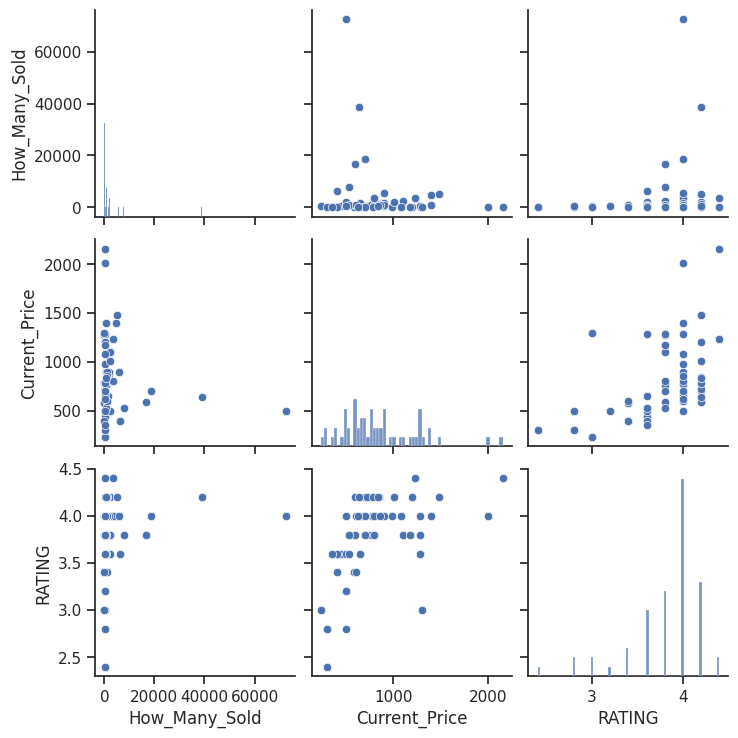

In [13]:
sns.set_theme(style="ticks")

sns.pairplot(men_shoes_data)